In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_reports(report_dir):
    with open(report_dir + "parameters.json") as f:
        parameters = json.load(f)
    with open(report_dir + "concluding.json") as f:
        concluding = json.load(f)
        
    intermediary = pd.read_csv(report_dir + "intermediary.csv")
    
    return (parameters, intermediary, concluding)

In [3]:
def parse_reports(report_dir):
    parameters, intermediary, concluding = load_reports(report_dir)

    intermediary['day'] = intermediary['time_step'] / parameters['time_steps_per_day']
    intermediary = intermediary.set_index('day')
    intermediary.drop('time_step', axis='columns', inplace=True)
    intermediary.rename({
        'num_susceptible': 'Susceptible', 
        'num_presymptomatic': 'Pre-symptomatic', 
        'num_infected': 'Infected', 
        'num_recovered': 'Recovered'}, 
        axis='columns', inplace=True)
    
    return (parameters, intermediary, concluding)

In [4]:
def graph_infections(intermediary, title):
    fig, ax = plt.subplots(figsize=(7,4))
    ax.set_ylabel('Number of People')
    ax.set_title(title)
    intermediary.plot(ax=ax)
    return fig

In [5]:
def print_end_stats(parameters, concluding):
    exec_time = concluding['simulation_execution_time_in_secs']
    steps_per_day = parameters['time_steps_per_day']
    total_steps = concluding['total_time_steps']
    
    print(f"Time-steps per day: {steps_per_day}")
    print(f"Simulation length: {total_steps} time-steps, {(total_steps / steps_per_day):.2f} days")
    print(f"Total execution time: {exec_time:.2f}s")
    print(f"Average time per time-step: {(exec_time / total_steps):.6f}s")
    print(f"Average time per day of simulation: {(exec_time / (total_steps / steps_per_day)):.6f}s")

Time-steps per day: 48
Simulation length: 35040 time-steps, 730.00 days
Total execution time: 19.45s
Average time per time-step: 0.000555s
Average time per day of simulation: 0.026642s


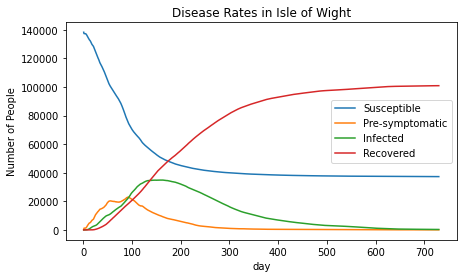

In [6]:
parameters, intermediary, concluding = parse_reports("../../reports/isle_of_wight/0/")
fig = graph_infections(intermediary, 'Disease Rates in Isle of Wight')
fig.savefig('graphs/isle_of_wight')
print_end_stats(parameters, concluding)

Time-steps per day: 48
Simulation length: 35040 time-steps, 730.00 days
Total execution time: 412.93s
Average time per time-step: 0.011784s
Average time per day of simulation: 0.565654s


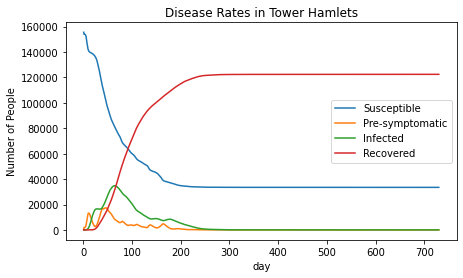

In [7]:
parameters, intermediary, concluding = parse_reports("../../reports/tower_hamlets/0/")
fig = graph_infections(intermediary, 'Disease Rates in Tower Hamlets')
fig.savefig('graphs/tower_hamlets')
print_end_stats(parameters, concluding)

Time-steps per day: 48
Simulation length: 35040 time-steps, 730.00 days
Total execution time: 107.28s
Average time per time-step: 0.003062s
Average time per day of simulation: 0.146961s


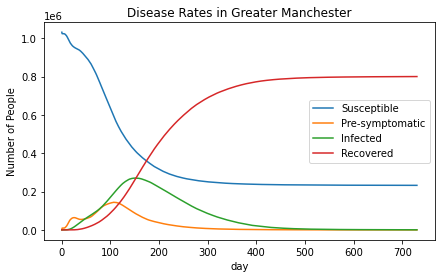

In [8]:
parameters, intermediary, concluding = parse_reports("../../reports/greater_manchester/0/")
fig = graph_infections(intermediary, 'Disease Rates in Greater Manchester')
fig.savefig('graphs/greater_manchester')
print_end_stats(parameters, concluding)

Time-steps per day: 48
Simulation length: 35040 time-steps, 730.00 days
Total execution time: 644.06s
Average time per time-step: 0.018381s
Average time per day of simulation: 0.882269s


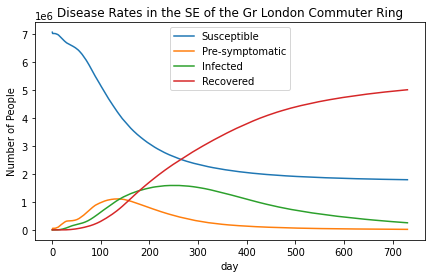

In [9]:
parameters, intermediary, concluding = parse_reports("../../reports/london_se_commuter_ring/0/")
fig = graph_infections(intermediary, 'Disease Rates in the SE of the Gr London Commuter Ring')
fig.savefig('graphs/london_se_commuter_ring')
print_end_stats(parameters, concluding)

Time-steps per day: 48
Simulation length: 35040 time-steps, 730.00 days
Total execution time: 205.81s
Average time per time-step: 0.005874s
Average time per day of simulation: 0.281938s


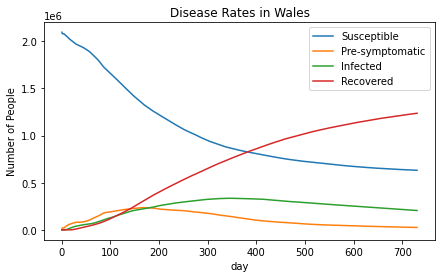

In [10]:
parameters, intermediary, concluding = parse_reports("../../reports/wales/0/")
fig = graph_infections(intermediary, 'Disease Rates in Wales')
fig.savefig('graphs/wales')
print_end_stats(parameters, concluding)